In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, RepeatVector

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 2. Đọc file csv và gắng index với giá Close
file_path = "/content/drive/MyDrive/crt/FPTGRU.csv"
data = pd.read_csv(file_path)
data

,Date,Price
0,15/12/2023,96200.0
1,14/12/2023,96200.0
2,13/12/2023,95200.0
3,12/12/2023,96800.0
4,11/12/2023,95000.0
...,...,...
1745,21/12/2016,15311.6
1746,20/12/2016,15329.6
1747,19/12/2016,15383.6
1748,16/12/2016,15167.5


In [8]:
# Xử lý dữ liệu
prices = data['Price']

In [9]:
returns = 100 * data.Price.pct_change().dropna()

# Scale the prices using MinMaxScaler
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(data.Price.values.reshape(-1, 1))

Ratio 7-3


In [12]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [13]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [14]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
19/19 [==============================] - 3s 29ms/step - loss: 0.1461
Epoch 2/100
19/19 [==============================] - 1s 27ms/step - loss: 0.0187
Epoch 3/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0080
Epoch 4/100
19/19 [==============================] - 1s 27ms/step - loss: 0.0035
Epoch 5/100
19/19 [==============================] - 1s 30ms/step - loss: 0.0012
Epoch 6/100
19/19 [==============================] - 1s 27ms/step - loss: 5.0407e-04
Epoch 7/100
19/19 [==============================] - 1s 28ms/step - loss: 4.1720e-04
Epoch 8/100
19/19 [==============================] - 1s 27ms/step - loss: 4.0194e-04
Epoch 9/100
19/19 [==============================] - 0s 25ms/step - loss: 3.9583e-04
Epoch 10/100
19/19 [==============================] - 0s 18ms/step - loss: 3.8223e-04
Epoch 11/100
19/19 [==============================] - 0s 18ms/step - loss: 3.7538e-04
Epoch 12/100
19/19 [==============================] - 0s 19ms/step - loss: 3.6783e-

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

16/16 [==============================] - 0s 10ms/step
[[1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]
 [1780]]
1/1 [==============================] - 0s 37ms/step
[16225.039 16271.302 16332.661 16327.329 16284.487 16218.249 16120.482
 16050.604 16080.9   16066.874 16165.491 16375.309 16551.436 16654.254
 16611.69  16529.848 16483.455 16473.598 16423.283 16281.249 16106.835
 16002.938 15887.898 15757.939 15664.552 15595.971 15549.749 15530.02
 15540.394 15480.344]


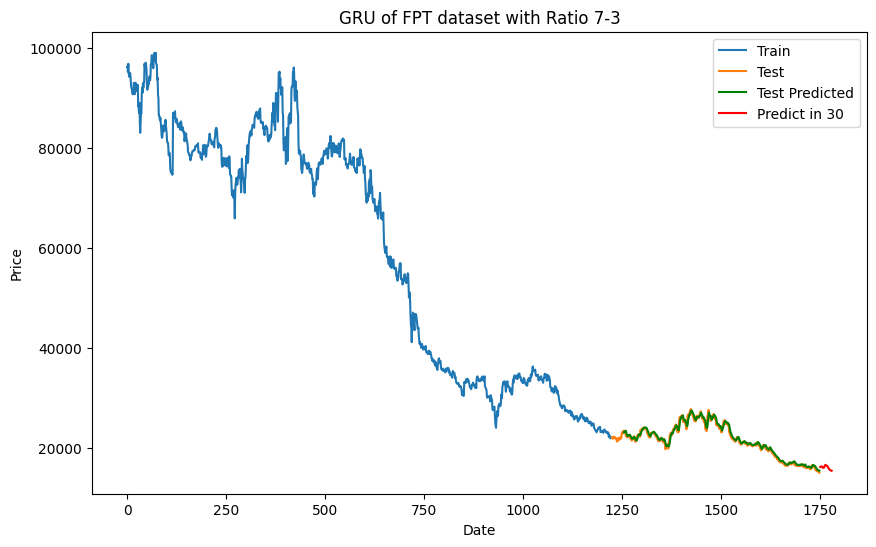

In [22]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of FPT dataset with Ratio 7-3')
plt.legend()
plt.show()

In [23]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

16/16 [==============================] - 0s 5ms/step


In [24]:
print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 0.017
MAE: 368.495
RMSE: 471.429
-------------------


Ratio 8-2


In [25]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [26]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [27]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
22/22 [==============================] - 7s 22ms/step - loss: 0.1564
Epoch 2/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0198
Epoch 3/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0060
Epoch 4/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0011
Epoch 5/100
22/22 [==============================] - 0s 19ms/step - loss: 3.9306e-04
Epoch 6/100
22/22 [==============================] - 1s 23ms/step - loss: 3.7266e-04
Epoch 7/100
22/22 [==============================] - 0s 19ms/step - loss: 3.5660e-04
Epoch 8/100
22/22 [==============================] - 0s 22ms/step - loss: 3.4424e-04
Epoch 9/100
22/22 [==============================] - 1s 38ms/step - loss: 3.3300e-04
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 3.2215e-04
Epoch 11/100
22/22 [==============================] - 1s 32ms/step - loss: 3.1677e-04
Epoch 12/100
22/22 [==============================] - 1s 33ms/step - loss: 3.08

In [32]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

10/10 [==============================] - 1s 10ms/step
[[1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]
 [1780]]
1/1 [==============================] - 1s 559ms/step
[16021.381 16069.99  16131.852 16119.552 16072.801 16005.026 15905.328
 15838.981 15879.362 15861.26  15969.131 16188.48  16359.599 16453.355
 16396.7   16311.913 16270.844 16265.953 16212.369 16061.835 15885.077
 15789.321 15674.631 15543.476 15453.818 15388.    15343.801 15326.231
 15338.969 15271.88 ]


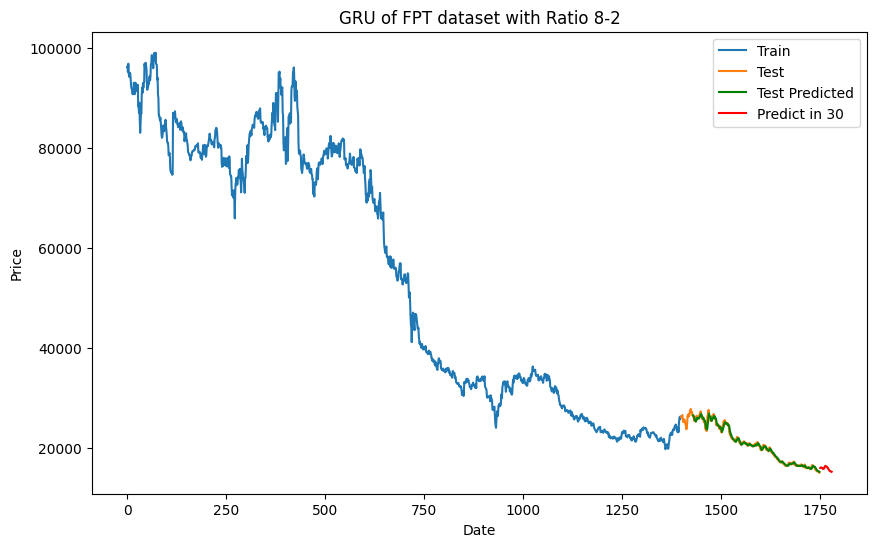

In [33]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of FPT dataset with Ratio 8-2')
plt.legend()
plt.show()

In [46]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

5/5 [==============================] - 0s 6ms/step


In [35]:

print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')

---------TEST----------
MAPE: 0.013
MAE: 271.654
RMSE: 388.5
-------------------


Ratio 9-1

In [49]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.9)
test_size = int(len(scaled_prices) * 0.1)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [50]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [51]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [52]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [53]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [54]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
25/25 [==============================] - 4s 30ms/step - loss: 0.0223
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0016
Epoch 3/100
25/25 [==============================] - 1s 29ms/step - loss: 3.0632e-04
Epoch 4/100
25/25 [==============================] - 1s 27ms/step - loss: 2.6488e-04
Epoch 5/100
25/25 [==============================] - 1s 29ms/step - loss: 2.5286e-04
Epoch 6/100
25/25 [==============================] - 1s 25ms/step - loss: 2.5558e-04
Epoch 7/100
25/25 [==============================] - 0s 19ms/step - loss: 2.4084e-04
Epoch 8/100
25/25 [==============================] - 0s 18ms/step - loss: 2.3298e-04
Epoch 9/100
25/25 [==============================] - 0s 19ms/step - loss: 2.2727e-04
Epoch 10/100
25/25 [==============================] - 0s 18ms/step - loss: 2.2560e-04
Epoch 11/100
25/25 [==============================] - 0s 20ms/step - loss: 2.1842e-04
Epoch 12/100
25/25 [==============================] - 0s 19ms/step - lo

In [56]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

5/5 [==============================] - 0s 9ms/step
[[1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]
 [1780]]
1/1 [==============================] - 0s 26ms/step
[16189.621  16260.886  16332.451  16268.956  16188.689  16102.6875
 15980.782  15935.271  16053.27   16007.953  16192.69   16498.855
 16647.121  16678.916  16509.717  16390.418  16380.338  16410.78
 16331.996  16111.026  15904.991  15861.94   15745.437  15600.709
 15535.147  15488.397  15459.67   15460.044  15493.757  15372.494 ]


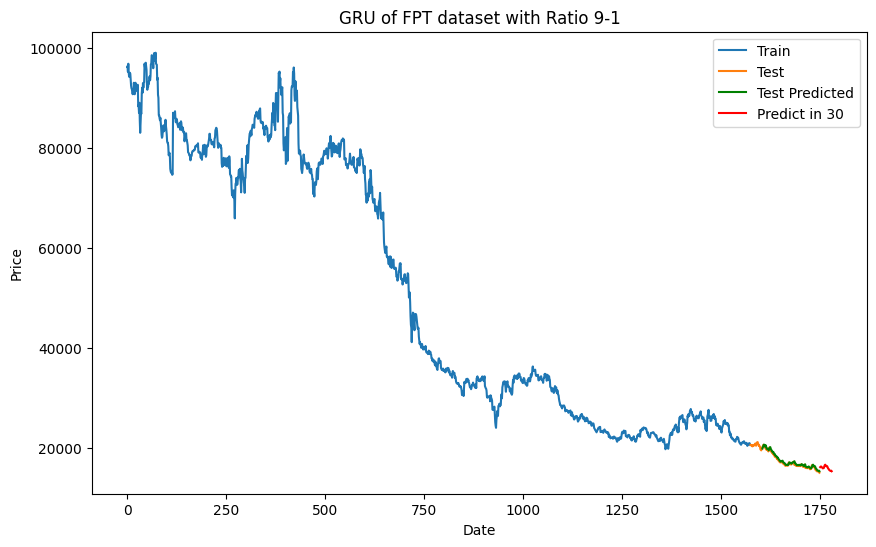

In [57]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of FPT dataset with Ratio 9-1')
plt.legend()
plt.show()

In [58]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

5/5 [==============================] - 0s 7ms/step


In [59]:

print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')

---------TEST----------
MAPE: 0.013
MAE: 218.271
RMSE: 263.413
-------------------
